<a href="https://colab.research.google.com/github/samarkinav/ML/blob/main/Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Результаты экзамена** 


Мы хотим предсказать сдаст или не сдаст студент экзамен исходя из социальной, гендерной и учебной информации о нём.

##1. Загрузка данных



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd 
import seaborn as sns 
import sklearn

In [ ]:
url = "https://raw.githubusercontent.com/samarkinav/ML/main/students_final.csv"
data_raw = pd.read_csv(url)

Таблица содержит данные о студентах, обучающихся на курсах математики и португальского языка в средней школе.
Вначале посмотрим на размеры таблицы - количество строк (каждая строка соответствует одному студенту) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [ ]:
data_raw.shape

(1044, 31)

In [ ]:
type(data_raw)

pandas.core.frame.DataFrame

In [ ]:
data_raw.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Mark
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,passed
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,passed
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,passed


In [ ]:
data_raw.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Mark
1039,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,NaN,yes,no,yes,yes,no,5,4,2,1,2,5,4,passed
1040,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,passed
1041,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,fail
1042,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,passed
1043,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,4,passed


Мы видим, что столбцы (признаки) имеют названия:


*   school - школа студента (двоичный: 'GP' - Gabriel Pereira или 'MS' - Mousinho da Silveira) 
*   sex - пол студента (двоичный: 'F' - женский или 'M' - мужской)
*   age - возраст студента (числовой: от 15 до 22)
*   address - тип домашнего адреса студента (двоичный: 'U' - городской or 'R' - сельский)
*   famsize - размер семьи (двоичный: 'LE3' - меньше или равно 3 или 'GT3' - больше 3) 
*   Pstatus - статус сожительства родителей (двоичный: 'T' - живут вместе или 'A' - раздельно) 
*   Medu - образование матери (числовой: 0 - без, 1 - начальное образование (4 класса), 2 – с 5 по 9 класс, 3 – среднее образование или 4 – высшее образование) 
*   Fedu - образование отца (числовой: 0 - без, 1 - начальное образование (4 класса), 2 – с 5 по 9 
класс, 3 – среднее образование или 4 – высшее образование) 
*   Mjob - работа матери (номинальный: 'teacher', 'health' care related, civil 'services', 'at_home' или 'other') 
*   Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services', 'at_home' или 'other')
*   reason - причина выбора данной школы (номинальный: близко к 'home', школьная 'reputation', 'course' или 'other')
*   guardian - опекун студента (номинальный: 'mother', 'father' или 'other') • traveltime - время в пути от дома до школы (номинальный: 1 - 1 hour)
*   studytime - кол-во учебного времени в неделю (номинальный: 1 - 10 hours)
*   failures - кол-во пропущенных занятий 
*   schoolsup - дополнительная образовательная поддержка (двоичный: yes или no)
*   famsup - семейная образовательная поддержка (двоичный: yes или no)
*   paid - платные дополнительные занятия по курсу (математика или португальский) (двоичный: yes или no) 
*   activities - внеклассные мероприятия (двоичный: yes или no)
*   nursery - посещал ли студент детский сад (двоичный: yes или no)
*   higher - хочет ли студент получить высшее образование (двоичный: yes или no)
*   internet - доступ к Интернету дома (двоичный: yes или no)
*   romantic - состоит ли студент в романтических отношениях ((двоичный: yes или no)
*   famrel - качество семейных отношений (номинальный: от 1 - очень плохо до 5 - прекрасно) 
*   freetime - свободное рвемя после школы (номинальный: от 1 - очень мало до 5 - очень много)
*   goout - встречи с друзьями (номинальный: от 1 - очень мало до 5 - очень много)
*   Dalc - потребление алкоголя в течение будних дней (номинальный: от 1 - очень мало до 5 - очень много)
*   Walc - потребление алкоголя в течение выходных дней (номинальный: от 1 - очень мало до 5 - очень много) 
*   health - текущее состояние здоровья (номинальный: от 1 - очень плохо до 5 - очень хорошо)
*   absences - кол-во пропусков в школе (номинальное: от 0 до 93)

У каждого студента есть итоговая оценка ('fail' и 'passed')
Требуется предсказать результат студента Mark по остальным признакам. Это задача классификации.

In [ ]:
data_raw.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'Mark'],
      dtype='object')

In [ ]:
data_raw.index

RangeIndex(start=0, stop=1044, step=1)

##2. Визуализация данных и вычисление основных характеристик

Вначале рассмотрим среднее значение, стандартное отклонение, минимальное и максимальное значения, медиану и квартили. По умолчанию этот метод даёт информацию только о количественных признаках.

In [ ]:
data_raw.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


Получим информацию о категориальных признаках:

In [ ]:
data_raw.describe(include = ['object'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,Mark
count,1044,1044,1044,1044,1044,1044,1020,1037,1044,1044,1033,1024,1037,1044,1044,1044,1044,1044
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no,passed
freq,772,591,759,738,923,399,573,428,728,925,635,810,524,835,955,827,673,814


Из таблицы видно, что данные в стоблце Mark являются сбалансированными, так как ни один из классов не представляет меньше 10% от общего числа студентов.

Построим попарные матрицы разброса:

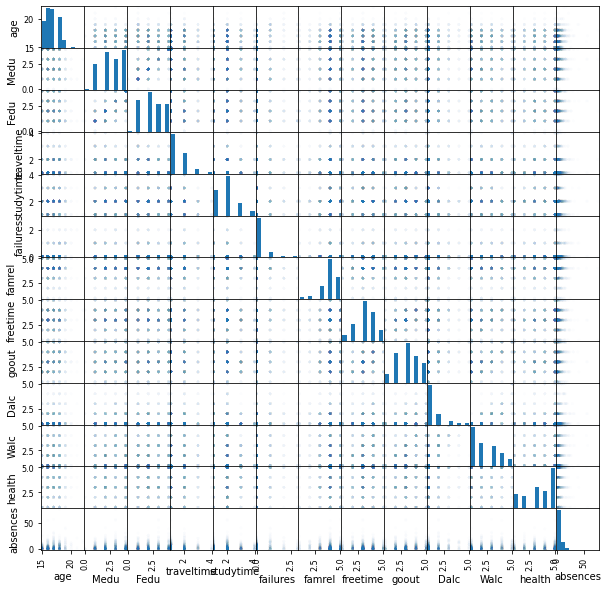

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_raw, alpha = .01, figsize = (10, 10))
pass

Матрица корреляции для количественных признаков:

In [ ]:
corr_mat = data_raw.corr()
corr_mat

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
age,1.000000,-0.130196,-0.138521,0.049216,-0.007870,0.282364,0.007162,0.002645,0.118510,0.133453,0.098291,-0.029129,0.153196
Medu,-0.130196,1.000000,0.642063,-0.238181,0.090616,-0.187769,0.015004,0.001054,0.025614,0.001515,-0.029331,-0.013254,0.059708
Fedu,-0.138521,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.013066,0.002142,0.030075,-0.000165,0.019524,0.034288,0.040829
traveltime,0.049216,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.012578,-0.007403,0.049740,0.109423,0.084292,-0.029002,-0.022669
studytime,-0.007870,0.090616,0.033458,-0.081328,1.000000,-0.152024,0.012324,-0.094429,-0.072941,-0.159665,-0.229073,-0.063044,-0.075594
failures,0.282364,-0.187769,-0.191390,0.087177,-0.152024,1.000000,-0.053676,0.102679,0.074683,0.116336,0.107432,0.048311,0.099998
famrel,0.007162,0.015004,0.013066,-0.012578,0.012324,-0.053676,1.000000,0.136901,0.080619,-0.076483,-0.100663,0.104101,-0.062171
freetime,0.002645,0.001054,0.002142,-0.007403,-0.094429,0.102679,0.136901,1.000000,0.323556,0.144979,0.130377,0.081517,-0.032079
goout,0.118510,0.025614,0.030075,0.049740,-0.072941,0.074683,0.080619,0.323556,1.000000,0.253135,0.399794,-0.013736,0.056142
Dalc,0.133453,0.001515,-0.000165,0.109423,-0.159665,0.116336,-0.076483,0.144979,0.253135,1.000000,0.627814,0.065515,0.132867


Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем меньше по абсолютной величине коэффициент корреляции:

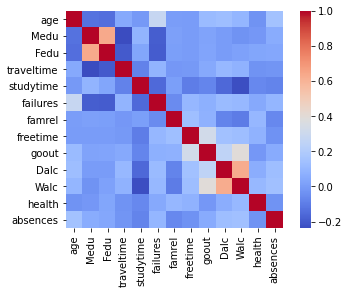

In [ ]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Выведем коэффициенты корреляции больше заданного значения 0,4:

In [ ]:
corr_mat > 0.4

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
age,True,False,False,False,False,False,False,False,False,False,False,False,False
Medu,False,True,True,False,False,False,False,False,False,False,False,False,False
Fedu,False,True,True,False,False,False,False,False,False,False,False,False,False
traveltime,False,False,False,True,False,False,False,False,False,False,False,False,False
studytime,False,False,False,False,True,False,False,False,False,False,False,False,False
failures,False,False,False,False,False,True,False,False,False,False,False,False,False
famrel,False,False,False,False,False,False,True,False,False,False,False,False,False
freetime,False,False,False,False,False,False,False,True,False,False,False,False,False
goout,False,False,False,False,False,False,False,False,True,False,False,False,False
Dalc,False,False,False,False,False,False,False,False,False,True,True,False,False


In [ ]:
corr_mat.where(np.triu(corr_mat > 0.4, k=1)).stack().sort_values(ascending=False)

Medu  Fedu    0.642063
Dalc  Walc    0.627814
dtype: float64

Заметим, что максимальный коэффициент корреляции достигается между признаки, отвечающими за образование родителей (Medu и Fedu - образование матери и отца соответственно) и за потребление алкоголя (Dalc и Walc - потребление алкоголя в будние и выходные дни соответсвенно). Остальные признаки почти не коррелируют между собой.

##3. Обработка пропущенных значений

In [ ]:
data_raw.isna().sum()

school         0
sex            0
age            0
address        0
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob          24
reason         7
guardian       0
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup        11
paid          20
activities     7
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       0
Mark           0
dtype: int64

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

In [ ]:
data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)

In [ ]:
data_raw.isna().sum()

school         0
sex            0
age            0
address        0
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob          24
reason         7
guardian       0
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup        11
paid          20
activities     7
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       0
Mark           0
dtype: int64

Пропущенные значения в столбцах, соответствующих категориальным признакам, заполним модой:

In [ ]:
data_raw['reason'].fillna(data_raw['reason'].mode().iloc[0], inplace=True)
data_raw['activities'].fillna(data_raw['activities'].mode().iloc[0], inplace=True)
data_raw['Fjob'].fillna(data_raw['Fjob'].mode().iloc[0], inplace=True)
data_raw['famsup'].fillna(data_raw['famsup'].mode().iloc[0], inplace=True)
data_raw['paid'].fillna(data_raw['paid'].mode().iloc[0], inplace=True)

In [ ]:
data_raw.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
Mark          0
dtype: int64

In [ ]:
data_raw.describe(include = 'all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Mark
count,1044,1044,1044.000000,1044,1044,1044,1044.000000,1044.000000,1044,1044,1044,1044,1044.000000,1044.000000,1044.000000,1044,1044,1044,1044,1044,1044,1044,1044,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,no,yes,no,no,yes,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,passed
freq,772,591,NaN,759,738,923,NaN,NaN,399,597,435,728,NaN,NaN,NaN,925,646,830,531,835,955,827,673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,814
mean,NaN,NaN,16.726054,NaN,NaN,NaN,2.603448,2.387931,NaN,NaN,NaN,NaN,1.522989,1.970307,0.264368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,NaN
std,NaN,NaN,1.239975,NaN,NaN,NaN,1.124907,1.099938,NaN,NaN,NaN,NaN,0.731727,0.834353,0.656142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,NaN
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,NaN
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,NaN
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,NaN


##4. Обработка категориальных признаков

Нужно что-то сделать с категориальными (номинальными) признаками

In [ ]:
Mark_col = data_raw['Mark']
data_raw = data_raw.drop('Mark', axis = 1)

In [ ]:
categorical_columns = [c for c in data_raw.columns if data_raw[c].dtype.name == 'object']
numerical_columns   = [c for c in data_raw.columns if data_raw[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


Отдельная таблица для количественных признаков:

In [ ]:
data_num = data_raw[numerical_columns]
data_num

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,18,4,4,2,2,0,4,3,4,1,1,3,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4
2,15,1,1,1,2,3,4,3,2,2,3,3,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2
4,16,3,3,1,2,0,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,19,2,3,1,3,1,5,4,2,1,2,5,4
1040,18,3,1,1,2,0,4,3,4,1,1,1,4
1041,18,1,1,2,2,0,1,1,1,1,1,5,6
1042,17,3,1,2,1,0,2,4,5,3,4,2,6


Выделим бинарные и небинарные категориальные признаки:

In [ ]:
data_describe = data_raw.describe(include = [object])
for col in categorical_columns:
    data_raw[col] = data_raw[col].fillna(data_describe[col]['top'])
binary_columns    = [col for col in categorical_columns if data_describe[col]['unique'] == 2]
nonbinary_columns = [col for col in categorical_columns if data_describe[col]['unique'] > 2]
print(binary_columns)
print(nonbinary_columns)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
['Mjob', 'Fjob', 'reason', 'guardian']


Бинарные признаки заменим на числовые:

In [ ]:
for col in binary_columns:
    data_raw[col] = pd.factorize(data_raw[col])[0]

Отдельная таблица для бинарных признаков:

In [ ]:
data_binary = data_raw[binary_columns]
data_binary

,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,0,0,1,0,1,0
2,0,0,0,1,1,0,0,1,0,0,0,1,0
3,0,0,0,0,1,1,1,1,1,0,0,1,1
4,0,0,0,0,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1,0,1,0,1,1,0,0,1,1,0,1,0
1040,1,0,0,1,1,1,1,0,0,0,0,1,0
1041,1,0,0,0,1,1,0,0,1,0,0,0,0
1042,1,1,0,1,1,1,0,0,0,1,0,1,0


К небинарными признакам применим метод векторизации, который заключается в следующем. Признак j, принимающий s значений, заменим на s признаков, принимащих значения 0 или 1, в зависимости от того, чему равно значение исходного признака j.

In [ ]:
data_nonbinary = pd.get_dummies(data_raw[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')


Отдельная таблица для небинарных признаков:

In [ ]:
data_nonbinary

,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
1040,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
1041,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1042,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0


##5. Нормализация

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.
Выполним стандартизацию (линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению) всех признаков:

In [ ]:
data_numerical = data_raw[numerical_columns]
data_numerical.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [ ]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [ ]:
data_numerical.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03
mean,-4.594026e-16,-6.107290e-16,-1.079543e-15,-3.836863e-16,-2.177909e-16,3.422124e-16,-4.714992e-17,-2.511826e-16,8.294770e-17,2.560744e-16,3.466788e-16,4.679101e-18,-1.023952e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.392007e+00,-2.314368e+00,-2.170969e+00,-7.147313e-01,-1.162945e+00,-4.029126e-01,-3.145298e+00,-2.133916e+00,-1.870708e+00,-5.421138e-01,-9.995160e-01,-1.785006e+00,-7.141472e-01
25%,-5.855391e-01,-5.364430e-01,-1.261827e+00,-7.147313e-01,-1.162945e+00,-4.029126e-01,6.875529e-02,-1.950054e-01,-1.003085e+00,-5.421138e-01,-9.995160e-01,-3.812046e-01,-7.141472e-01
50%,2.209290e-01,3.525197e-01,-3.526844e-01,-7.147313e-01,3.558863e-02,-4.029126e-01,6.875529e-02,-1.950054e-01,-1.354622e-01,-5.421138e-01,-2.213693e-01,3.206959e-01,-3.920869e-01
75%,1.027397e+00,1.241482e+00,5.564577e-01,6.518978e-01,3.558863e-02,-4.029126e-01,1.140106e+00,7.744501e-01,7.321606e-01,5.547211e-01,5.567773e-01,1.022596e+00,2.520338e-01
max,4.253269e+00,1.241482e+00,1.465600e+00,3.385156e+00,2.432655e+00,4.169270e+00,1.140106e+00,1.743906e+00,1.599783e+00,3.845226e+00,2.113071e+00,1.022596e+00,1.136312e+01


Соединим всё в одну таблицу:

In [ ]:
data = pd.concat((data_numerical, data_nonbinary, data_raw[binary_columns]), axis = 1)
print(data.shape)

(1044, 43)


In [ ]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,-4.594026e-16,-6.107290e-16,-1.079543e-15,-3.836863e-16,-2.177909e-16,3.422124e-16,-4.714992e-17,-2.511826e-16,8.294770e-17,2.560744e-16,3.466788e-16,4.679101e-18,-1.023952e-16,0.185824,0.078544,0.382184,0.228927,0.124521,0.059387,0.036398,0.571839,0.273946,0.058429,0.416667,0.245211,0.102490,0.235632,0.232759,0.697318,0.069923,0.260536,0.433908,0.272989,0.293103,0.884100,0.886015,0.618774,0.204981,0.491379,0.200192,0.085249,0.792146,0.355364
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.389151,0.269155,0.486154,0.420344,0.330333,0.236461,0.187369,0.495049,0.446196,0.234666,0.493243,0.430418,0.303438,0.424597,0.422792,0.459639,0.255140,0.439138,0.495850,0.445708,0.455404,0.320259,0.317945,0.485921,0.403881,0.500165,0.400335,0.279386,0.405967,0.478853
min,-1.392007e+00,-2.314368e+00,-2.170969e+00,-7.147313e-01,-1.162945e+00,-4.029126e-01,-3.145298e+00,-2.133916e+00,-1.870708e+00,-5.421138e-01,-9.995160e-01,-1.785006e+00,-7.141472e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.855391e-01,-5.364430e-01,-1.261827e+00,-7.147313e-01,-1.162945e+00,-4.029126e-01,6.875529e-02,-1.950054e-01,-1.003085e+00,-5.421138e-01,-9.995160e-01,-3.812046e-01,-7.141472e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2.209290e-01,3.525197e-01,-3.526844e-01,-7.147313e-01,3.558863e-02,-4.029126e-01,6.875529e-02,-1.950054e-01,-1.354622e-01,-5.421138e-01,-2.213693e-01,3.206959e-01,-3.920869e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.027397e+00,1.241482e+00,5.564577e-01,6.518978e-01,3.558863e-02,-4.029126e-01,1.140106e+00,7.744501e-01,7.321606e-01,5.547211e-01,5.567773e-01,1.022596e+00,2.520338e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,4.253269e+00,1.241482e+00,1.465600e+00,3.385156e+00,2.432655e+00,4.169270e+00,1.140106e+00,1.743906e+00,1.599783e+00,3.845226e+00,2.113071e+00,1.022596e+00,1.136312e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000

##6. Разбиение данных на обучающую и тестовую выборки

In [ ]:
X = data
y = Mark_col
feature_names = X.columns

In [ ]:
type(feature_names)

pandas.core.indexes.base.Index

In [ ]:
feature_names

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'school', 'sex', 'address',
       'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

70% выборки сделаем обучающей, остальные 30% - тестовой

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

730 314


##7. Классификация и вычисление ошибок

###Метод ближайших соседей 
Для нового объекта алгоритм ищет в обучающей выборке k наиболее близких объекта и относит новый объект к тому классу, которому принадлежит большинство из них.

Вначале обучим модель:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

После того, как модель обучена, мы можем предсказывать значение целевого признака по входным признакам для новых объектов. Делается это с помощью метода predict.
Нас интересует качество построенной модели, поэтому будем предсказывать значение выходного признака на тех данных, для которых оно известно: на обучающей и (что более важно) тестовой выборках:

In [ ]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print (err_train, err_test)

0.1684931506849315 0.22929936305732485


Ошибки на обучающей и тестовой выборке равны соответственно 16,8% и 22,9%

Более важной является ошибка на тестовой выборке, так как мы должны уметь предсказывать правильное (по возможности) значение на новых объектах, которые при обучении были недоступны.
Попробуем уменьшить тестовую ошибку, варьируя параметры метода.

Поиск оптимальных значений параметров можно осуществить с помощью класса GridSearchCV – поиск наилучшего набора параметров, доставляющих минимум ошибке перекрестного контроля (cross-validation). По умолчанию рассматривается 3-кратный перекрестный контроль.

In [ ]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.1863013698630137 20


В качестве оптимального метод выбрал значение k равное 20. Ошибка перекрестного контроля составила 18,6%, что даже больше ошибки на обучающей выборке для 10 ближайших соседей. Это может быть обусленно тем, что для построения моделей в рамках схемы перекрестного контроля используются не все данные.

Проверим, чему равны ошибки на обучающей и тестовой выборках при этом значении параметра

In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))
print (err_train, err_test)

0.18356164383561643 0.2356687898089172


Как видим, метод ближайших соседей на этой задаче дает не слишком удовлетворительные результаты.

###Метод SVC - машина опорных векторов

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print (err_train, err_test)

0.13013698630136986 0.2197452229299363


Итак, на тестовой выборке получили ошибку в 21,9%.

###Random Forest
Воспользуемся одним из самых популярных алгоритмов машинного обучения – случайный лес – Random Forest.
Алгоритм строит ансамбль случайных деревьев, каждое из которых обучается на выборке, полученной из исходной с помощью процедуры изъятия с возвращением.

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
print (err_train, err_test)

0.00410958904109589 0.2611464968152866


Ошибка на тестовой выборке составила 26%

Одной из важных процедур предобработки данных в алгоритмах их анализа является отбор значимых признаков. Его цель заключается в том, чтобы отобрать наиболее существенные признаки для решения рассматриваемой задачи классификации.

Упорядочим значимости и выведем их значения:


In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

Feature importances:
 1. feature 'absences' (0.1174)
 2. feature 'failures' (0.1001)
 3. feature 'goout' (0.0427)
 4. feature 'age  ' (0.0421)
 5. feature 'Fedu ' (0.0399)
 6. feature 'famrel' (0.0380)
 7. feature 'Walc ' (0.0379)
 8. feature 'freetime' (0.0364)
 9. feature 'health' (0.0350)
10. feature 'higher' (0.0323)
11. feature 'Medu ' (0.0310)
12. feature 'paid ' (0.0289)
13. feature 'studytime' (0.0273)
14. feature 'traveltime' (0.0271)
15. feature 'Dalc ' (0.0262)
16. feature 'address' (0.0204)
17. feature 'romantic' (0.0181)
18. feature 'school' (0.0175)
19. feature 'reason_course' (0.0156)
20. feature 'famsup' (0.0154)
21. feature 'nursery' (0.0154)
22. feature 'activities' (0.0154)
23. feature 'famsize' (0.0153)
24. feature 'schoolsup' (0.0146)
25. feature 'Mjob_other' (0.0145)
26. feature 'Fjob_other' (0.0141)
27. feature 'internet' (0.0137)
28. feature 'sex  ' (0.0136)
29. feature 'guardian_father' (0.0133)
30. feature 'Mjob_at_home' (0.0125)
31. feature 'Fjob_services' (0

Построим столбцовую диаграмму, графически представляющую значимость первых 20 признаков:

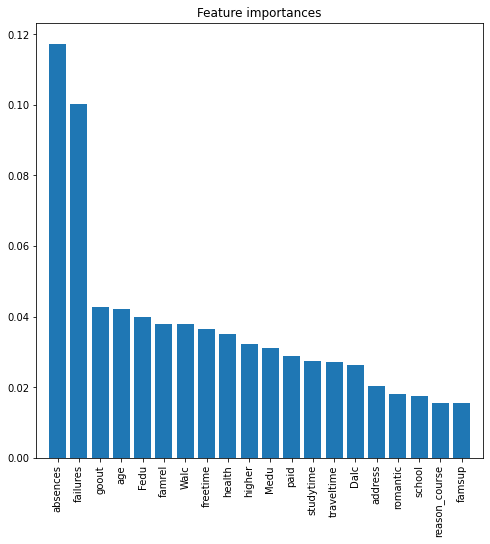

In [ ]:
d_first = 20
plt.figure(figsize=(8, 8))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [ ]:
best_features = indices[:8]
best_features_names = feature_names[best_features]
print(best_features_names)

Index(['absences', 'failures', 'goout', 'age', 'Fedu', 'famrel', 'Walc',
       'freetime'],
      dtype='object')


Мы видим, что основную роль играют признаки 'absences', 'failures', 'goout', 'age', 'Fedu', 'famrel', 'Walc', 'freetime'.

###GBT – градиентный бустинг деревьев решений 
Это еще один метод, строящий ансамбль деревьев решений. На каждой итерации строится новый классификатор, аппроксимирующий значение градиента функции потерь.

In [ ]:
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))
print (err_train, err_test)

0.09041095890410959 0.2070063694267516


Ошибка на тестовой выборке составила 20,7%

*Теперь используем только значимые признаки для обучени моделей:*

In [ ]:
X = data.loc[:,['absences', 'failures', 'goout', 'age', 'Fedu', 'famrel', 'Walc', 'freetime']]
y = Mark_col

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

730 314


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print (err_train, err_test)

0.1780821917808219 0.2515923566878981


Метод kNN - ошибка на тестовой выборке 25%

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print (err_train, err_test)

0.15616438356164383 0.22611464968152867


Метод SVC - ошибка на тестовой выборке 22,6%

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
print (err_train, err_test)

0.010958904109589041 0.24203821656050956


Метод RF - ошибка на тестовой выборке 24,2%

In [ ]:
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))
print (err_train, err_test)

0.11506849315068493 0.21656050955414013


Метод GBT - ошибка на тестовой выборке 21,6%

Заметим, что при обучении модели на всех признаках лучшим проявил себя метод GBT с ошибкой 20,7%. При использовании только значимых признаков для обучения модели ошибка на тестовой выборке только увеличалась.